|-------------------------------|-------------------------------|-----------------------------|
|:--                            |              :----:           |                        :---:|
|**Machine Learning**           |Dr. Hector Ceballos            |Dr. Neil Hernández           |
|**Second Mid-Term**            |Adrián García López            |Sharif Nasser Kadamani       |
|30 / 10 / 2020                 |A01351166                      |A00820367                    |
|-------------------------------|-------------------------------|-----------------------------|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score, davies_bouldin_score
%matplotlib inline

In [2]:
df = pd.read_csv("publication_strategies.csv")

# Descriptive Analysis

In [3]:
df.head()

,clave,affiliations,intl_afil,authors,docs,book,chapter,conference,journal,q1q2,cites_3y,q3q4
0,1-2007,10,0,22,1,0,0,0,4,4,2,0
1,1-2008,11,2,23,2,0,0,0,5,2,2,3
2,1-2009,6,1,14,1,0,0,0,2,1,2,1
3,1-2010,32,18,59,6,0,0,0,8,6,6,2
4,1-2011,3,0,5,0,0,0,0,1,1,0,0


In [4]:
df.describe()

,affiliations,intl_afil,authors,docs,book,chapter,conference,journal,q1q2,cites_3y,q3q4
count,24808.000000,24808.000000,24808.000000,24808.000000,24808.000000,24808.000000,24808.000000,24808.000000,24808.000000,24808.000000,24808.000000
mean,4.271525,0.843357,9.497904,0.720372,0.024508,0.155676,0.565826,1.165390,0.909183,1.356538,0.301516
std,9.322728,6.601937,38.507583,1.439740,0.190590,0.794801,1.447716,1.800131,1.522177,3.221530,0.766290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6.000000,1.000000,12.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000
max,708.000000,665.000000,3909.000000,49.000000,5.000000,33.000000,29.000000,24.000000,24.000000,93.000000,15.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24808 entries, 0 to 24807
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   clave         24808 non-null  object
 1   affiliations  24808 non-null  int64 
 2   intl_afil     24808 non-null  int64 
 3   authors       24808 non-null  int64 
 4   docs          24808 non-null  int64 
 5   book          24808 non-null  int64 
 6   chapter       24808 non-null  int64 
 7   conference    24808 non-null  int64 
 8   journal       24808 non-null  int64 
 9   q1q2          24808 non-null  int64 
 10  cites_3y      24808 non-null  int64 
 11  q3q4          24808 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 2.3+ MB


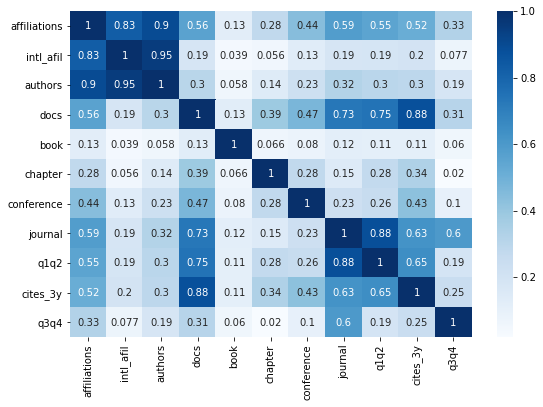

In [6]:
f, ax = plt.subplots(figsize=(9, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, ax=ax, cmap=plt.cm.Blues)
plt.show()

In [31]:
sns.pairplot(df)
plt.show()

KeyboardInterrupt: 

In [7]:
X = df.iloc[:, 1:].values

# Principal Component Analysis (PCA)

## Standardize the data

In [8]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

## Select number of components for PCA

### Short way

In [9]:
from sklearn.decomposition import PCA
variance_needed = 0.95
pca = PCA(n_components = variance_needed) # we indicate that we want to keep at leat 95% of variance explained
X_pca = pca.fit_transform(X_std)
print(f"Number of components needed to have at least {95}% of explained variance = {pca.n_components_}")

Number of components needed to have at least 95% of explained variance = 7


### Long way

In [10]:
pca = PCA()
X_pca = pca.fit(X_std)

In [11]:
eigen_vectors= pca.components_
eigen_values = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
numbers_of_components = range(1, len(explained_variance_ratio) + 1)
print(pd.DataFrame( {'cumulativa explained variance': np.cumsum(explained_variance_ratio)}, index=numbers_of_components))

    cumulativa explained variance
1                        0.436807
2                        0.610756
3                        0.720896
4                        0.809544
5                        0.881717
6                        0.946376
7                        0.984301
8                        0.993367
9                        0.996403
10                       0.998941
11                       1.000000


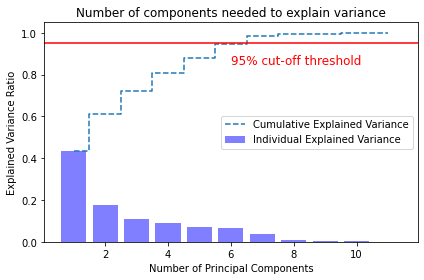

In [12]:
plt.figure(figsize=(6, 4))
plt.bar(numbers_of_components, explained_variance_ratio, alpha=0.5, align='center',
        label='Individual Explained Variance', color='blue')
plt.step(numbers_of_components, np.cumsum(explained_variance_ratio), where='mid', linestyle='--', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(6, 0.85, '95% cut-off threshold', color = 'red', fontsize=12)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.title("Number of components needed to explain variance")
plt.legend(loc='best')
plt.tight_layout()

### Results
We decided to use the first six Principal Components since they are able to explain almost 95% of the variance, while reducing the number of numerical variables from 11 to 6 - almost half.

## Dimensionality reduction

In [15]:
num_components = 6
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std)

### Optional: Check which features are contributing most to the components

In [16]:
pd.DataFrame(pca.components_, columns = df.columns[1:])

,affiliations,intl_afil,authors,docs,book,chapter,conference,journal,q1q2,cites_3y,q3q4
0,0.403588,0.254985,0.309398,0.387423,0.077364,0.176546,0.229707,0.372138,0.359975,0.360624,0.195546
1,0.313143,0.586310,0.519562,-0.276935,-0.051376,-0.133712,-0.077992,-0.236277,-0.237041,-0.244588,-0.114470
2,0.010720,-0.005450,-0.013766,0.094496,0.048798,0.550542,0.436449,-0.376796,-0.084942,0.128788,-0.573580
3,0.009007,-0.002345,-0.006107,-0.055681,0.992848,-0.039155,-0.016894,-0.026774,-0.056913,-0.062184,0.037248
4,-0.058513,0.092870,0.020681,0.071649,0.049969,-0.101543,-0.578888,0.105617,0.453343,0.097769,-0.638934
5,0.008729,0.007921,0.045410,-0.096001,-0.005053,0.781404,-0.516604,0.028574,-0.034440,-0.156428,0.290882


# K-means Clustering

## Find optimal number of clusters

In [17]:
sse = []
silhouette_coeff = []
davies_bouldin_index = []

K = range(1,16) 

for k in K:  
    k_means = KMeans(n_clusters=k)
    cluster_labels = k_means.fit_predict(X_pca)     
    
    sse.append(k_means.inertia_)
    if k > 1:
        silhouette_coeff.append(silhouette_score(X_pca, cluster_labels))
        davies_bouldin_index.append(davies_bouldin_score(X_pca, cluster_labels))

KeyboardInterrupt: 

In [ ]:
number_clusters = 3

fig, ax = plt.subplots(1, 3, figsize=(15,4))

ax[0].plot(K, sse, 'bx-') 
ax[0].axvline(x=number_clusters, color='r', linestyle='--')
ax[0].set_xlabel('Number of clusters') 
ax[0].set_ylabel('SSE') 
ax[0].set_title('Elbow Method')

ax[1].plot(K[1:], silhouette_coeff, 'bx-')
ax[1].axvline(x=number_clusters, color='r', linestyle='--')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Silhouette Coefficient') 
ax[1].set_title('Silhouette Analysis')

ax[2].plot(K[1:], davies_bouldin_index, 'bx-')
ax[2].axvline(x=number_clusters, color='r', linestyle='--')
ax[2].set_xlabel('Number of clusters')
ax[2].set_ylabel('Davies-Bouldin Values') 
ax[2].set_title('Davies-Bouldin Index')

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()

### Results
Using these three methods together, we found that 3 is the best number of clusters to find in the dataset. 

## Generate clusters

In [19]:
k_means = KMeans(n_clusters=number_clusters)
kmeans_clusters = k_means.fit_predict(X_pca) 

## Describe clusters

In [20]:
cluster = {}
table_kmeans = pd.DataFrame(index=range(number_clusters), columns=["size"] + df.columns[1:].tolist())

for i in range(number_clusters):
    cluster[str(i)] = df[kmeans_clusters == i]
    cluster[str(i) + "_avg"] = cluster[str(i)].mean()
    table_kmeans.loc[i, "size"] = len(cluster[str(i)])

    for column in df.columns[1:]:
        table_kmeans.loc[i, column] = cluster[str(i) + "_avg"][column]   

In [29]:
new_columns = table_kmeans.columns.tolist()
new_columns.remove("cites_3y")
new_columns += ["cites_3y"]
table_kmeans = table_kmeans[new_columns]
print("-------- Table with clusters size, original features average and CITES 3Y mean for K-Mean clusters --------")
table_kmeans

-------- Table with clusters size, original features average and CITES 3Y mean for K-Mean clusters --------


,size,affiliations,intl_afil,authors,docs,book,chapter,conference,journal,q1q2,q3q4,cites_3y
0,21833,2.47758,0.417579,5.395,0.356662,0.0134201,0.0856502,0.368067,0.695232,0.535932,0.18701,0.625567
1,2970,16.7434,3.3,35.8202,3.38721,0.106061,0.670707,2.01717,4.61347,3.64646,1.14175,6.7037
2,5,429.4,400.8,2289.8,4.8,0,0,2,6,4.8,1.2,17


# DBSCAN Model

## Generate clusters

In [22]:
dbscan = DBSCAN(eps=5, min_samples=50)
dbscan_clusters = dbscan.fit_predict(X_pca)
n_clusters = np.sum(np.unique(dbscan_clusters)>-1)
print("Estimated number of clusters: ", n_clusters)
n_noise = np.sum(dbscan_clusters==-1)
print("Estimated number of noise points: ", n_noise)
print(f"Estimated percentage of outliers: {n_noise/len(dbscan_clusters)*100}%")

Estimated number of clusters:  3
Estimated number of noise points:  113
Estimated percentage of outliers: 0.4554982263785876%


## Describe clusters

In [23]:
dbscan_cluster = {}
table_dbscan = pd.DataFrame(index=range(n_clusters), columns=["size"] + df.columns[1:].tolist())

for i in range(n_clusters):
    dbscan_cluster[str(i)] = df[dbscan_clusters == i]
    dbscan_cluster[str(i) + "_avg"] = dbscan_cluster[str(i)].mean()
    table_dbscan.loc[i, "size"] = len(dbscan_cluster[str(i)])

    for column in df.columns[1:]:
        table_dbscan.loc[i, column] = dbscan_cluster[str(i) + "_avg"][column]   

In [27]:
table_dbscan = table_dbscan[new_columns]
print("------ Table with clusters size, original features average and CITES 3Y mean for DBSCAN clusters ------")
table_dbscan

------ Table with clusters size, original features average and CITES 3Y mean for DBSCAN clusters ------


,size,affiliations,intl_afil,authors,docs,book,chapter,conference,journal,q1q2,q3q4,cites_3y
0,24259,3.90531,0.689064,8.44091,0.669813,0,0.135208,0.531061,1.1141,0.865823,0.290655,1.24605
1,381,9.10761,1.73753,19.4488,1.39108,1,0.223097,0.971129,2.12336,1.59055,0.593176,2.61155
2,55,11.0727,2.05455,23.3818,1.67273,2,0.418182,1.16364,2.23636,1.70909,0.581818,2.63636


# Extra points


In [31]:
graph = pd.DataFrame(X_pca)
graph["kmeans_clusters"] = kmeans_clusters
graph["dbscan_clusters"] = dbscan_clusters

## Visualize clusters distribution with Principal Components 

### Visualize K-Means Clusters distribution with Principal Components 

In [30]:
sns.pairplot(graph, hue="kmeans_clusters")

NameError: name 'graph' is not defined

### Visualize DBSCAN Clusters distribution with Principal Components 

In [ ]:
sns.pairplot(graph, hue="dbscan_clusters")